In [14]:
from path import Path
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#ryan's changes 

In [30]:
data = Path('../Data/ticker_test.csv')
dfo = pd.read_csv(data)
dfo.head()

,Unnamed: 0,GOOG,GOOG.1,GOOG.2,GOOG.3,GOOG.4,GOOG.5,AMZN,AMZN.1,AMZN.2,...,AAPL.2,AAPL.3,AAPL.4,AAPL.5,BAC,BAC.1,BAC.2,BAC.3,BAC.4,BAC.5
0,NaN,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-07 09:30:00-05:00,1819.0,1832.3699951171875,1815.0,1826.0699462890625,1826.0699462890625,217731.0,3156.47998046875,3180.159912109375,3141.68994140625,...,122.25,123.83999633789062,123.83999633789062,27096048.0,28.899999618530273,29.0049991607666,28.684999465942383,28.90999984741211,28.90999984741211,10450511.0
3,2020-12-07 10:30:00-05:00,1826.010009765625,1828.0,1818.4200439453125,1820.5799560546875,1820.5799560546875,126213.0,3159.125,3167.0,3150.10009765625,...,123.69999694824219,124.13999938964844,124.13999938964844,10081072.0,28.915000915527344,29.040000915527344,28.84000015258789,29.020000457763672,29.020000457763672,4823265.0
4,2020-12-07 11:30:00-05:00,1820.3699951171875,1820.699951171875,1813.9625244140625,1816.0,1816.0,109135.0,3160.22998046875,3160.449951171875,3151.860107421875,...,123.79000091552734,124.16929626464844,124.16929626464844,7338780.0,29.013999938964844,29.1299991607666,28.989999771118164,29.030000686645508,29.030000686645508,3629845.0


In [16]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [17]:
y = df["GOOG.3"]
y.dropna()
y.head()

0                 Close
1                   NaN
2    1826.0699462890625
3    1820.5799560546875
4                1816.0
Name: GOOG.3, dtype: object

In [18]:
y.drop(y[y == 'Close'].index, inplace = True) 

In [19]:
y=y.dropna()

df = pd.DataFrame(y)
df.head()

,GOOG.3
2,1826.0699462890625
3,1820.5799560546875
4,1816.0
5,1810.5
6,1811.39501953125


In [20]:
forecast_col = 'GOOG.3'
forecast_out = 5
test_size = 0.2

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); 
#calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [21]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.8889230633803132, 'forecast_set': array([2099.09596944, 2099.12576937, 2098.85781228, 2100.44544593,
       2100.95156019])}


In [22]:
X_lately #x

array([[2.08888287],
       [2.08912842],
       [2.08692046],
       [2.10000255],
       [2.10417293]])

In [23]:
forecast #predicted

array([2099.09596944, 2099.12576937, 2098.85781228, 2100.44544593,
       2100.95156019])

In [41]:
y = dfo["Unnamed: 0"]
y = pd.DataFrame(y)
y=y.dropna()
y=y.loc[2:]
y["Unnamed: 0"]

2      2020-12-07 09:30:00-05:00
3      2020-12-07 10:30:00-05:00
4      2020-12-07 11:30:00-05:00
5      2020-12-07 12:30:00-05:00
6      2020-12-07 13:30:00-05:00
                 ...            
324    2021-02-12 11:31:51-05:00
325    2021-02-12 11:31:52-05:00
326    2021-02-12 11:31:53-05:00
327    2021-02-12 11:31:54-05:00
328    2021-02-12 11:31:56-05:00
Name: Unnamed: 0, Length: 327, dtype: object

In [58]:
gme=[]
for i in range(323):
    gme.append(i+1)
gme

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

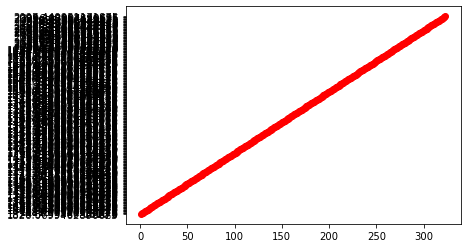

In [59]:
plt.plot(gme, list(df['GOOG.3']), 'ro')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='1bfgs',
                                max_iter=200,
                                random_state=1)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred=classifier.predict(X_test)
results=pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()